# A atividade 1 consiste em implementar e utilizar o método Gradiente Divergente para o cálculo de minimização de funções.

### Dada uma função $f(x)$ definida em um intervalo $[a,b]$, o método envolve o seguinte algoritmo:


1.   calcula-se o gradiente da função $f(x)$, isto é $\nabla f(x)$;
2.   define-se os parâmetros iniciais: $x_0$ que é o valor inicial, $\alpha$ que é a taxa de aprendizado (ou parâmetro de convergência), $\epsilon$ que é o critério de parada e $n$ que é o número de iterações;
3.   a primeira iteração atualiza o valor de $x$ da seguinte forma $x=x_0-\alpha\nabla f(x_0)$;
4. cada iteração seguinte atualiza o valor de $x$ com a seguinte expressão de recorrência: $x_n=x_{n-1}-\alpha\nabla f(x_{n-1})$. Quando o valor da diferença $x_{n-1}-x_n<\epsilon$ então adota-se $x_n$ como sendo o mínimo de $f(x)$ e suspende-se as iterações subsequentes.

### Em seguida, elabora-se o gráfico de $f(x)$ com as trajetórias de $x_n$ para se estudar a convergência em função dos parâmetros iniciais, sobretudo da taxa de aprendizado ($\alpha$).



In [1]:
#Importar bibliotecas

import numpy as np
import matplotlib.pyplot as plt

### Exercício 1: a função que desejamos calcular o mínimo é $u(x)=x^2-1$ cujo gradiente é dado por $\nabla u(x)=2x$. No código, a função gradiente descendente será definida como g_d1 para o exercício 1.

In [2]:
# Função que desejamos obter mínimo e seu gradiente (derivada)

def u(x):
  return x**2 - 1

def g_u(x):
  return 2*x

In [3]:
# Definir parâmetros iniciais: 'x_0' é a posição inicial, 'e' é o critério de parada,
# 'a' é a taxa de aprendizado, 'n' é o número de iterações até chegar ao mínimo.

x_0 = 5
e = 0.01
a = 0.9
n = 1000

In [4]:
# Implementando a função gradiente descendente que é o método para se obter o
# mínimo da função u(x) definida acima.

def g_d1(u,g_u,x_0,a,e,n):
  # Primeiro faço uma plotagem da figura de u(x) em um intervalo qualquer.
  plt.plot(np.linspace(-4,4,100), u(np.linspace(-4,4,100)), label = '$x^2-1$')

  #crio uma lista vazia para armazenar os valores dos novos valores de x.
  z = []

  #aqui vem um loop para as iterações até se chegar ao mínimo.
  for i in range(n):
    x = x_0 - a*g_u(x_0)
    r = x_0 - x
    #print(f'A variação da posição é {x_0}-{x}={r}')
    z.append(x)
    if abs(r) < e:
      break
    x_0 = x
  plt.scatter(z, u(np.array(z)), color='g', label="Trajetória de $x$ até o mínimo")
  plt.plot(z, u(np.array(z)), 'g--')
  plt.title("Método Gradiente Descendente")
  plt.xlabel("x")
  plt.ylabel("u(x)")
  plt.legend()
  return print(f'o mínimo é {x}')

o mínimo é 0.003961408125713228


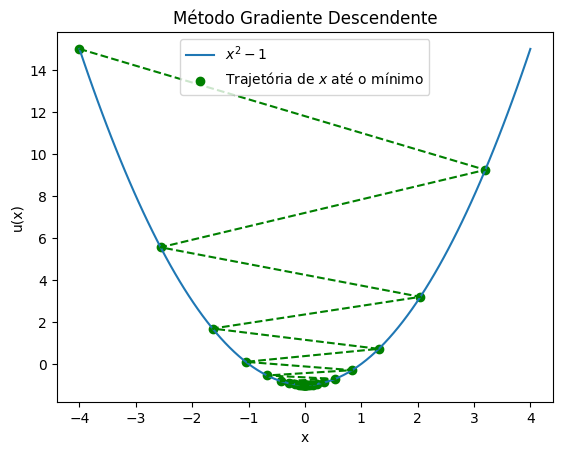

In [5]:
# usando a função g_d1 para calcular o mínimo de x^2-1.

g_d1(u,g_u,x_0,a,e,n)

### Exercício 2: a função para se obter o mínimo é $v(x)=x^4-x^2$ cujo gradiente é dado por $\nabla v(x)= 4x^3-2x$. No código a função que executa o método gradiente descendente é denominada g_d2 para o exercício 2.

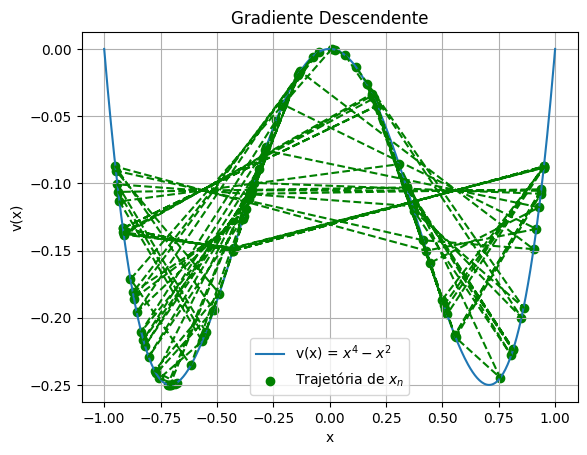

In [6]:
# Função e seu gradiente
def v(x):
    return (x**4 - x**2)

def g_v(x):
    return (4*x**3 - 2*x)

# Gradiente descendente com visualização
def g_d2(u, g_u, x_0, a, e, n):
    x_vals = np.linspace(-1, 1, 400)
    plt.plot(x_vals, u(x_vals), label='v(x) = $x^4 - x^2$')

    z = []
    for i in range(n):
        x = x_0 - a * g_u(x_0)
        r = x - x_0
        z.append(x)
        if abs(r) < e:
            print(f'Convergência em {i} iterações. Mínimo: x = {x:.4f}')
            break
        if abs(x) > 1e5:  # prevenir overflow
            #print(f"Explodiu na iteração {i}.")
            break
        x_0 = x

    z = np.array(z)
    plt.scatter(z, u(z), color='g', label='Trajetória de $x_n$')
    plt.plot(z, u(z), 'g--')
    plt.title("Gradiente Descendente")
    plt.xlabel("x")
    plt.ylabel("v(x)")
    plt.legend()
    plt.grid(True)
    plt.show()
    return z

# Testando a convergência
trajetoria = g_d2(v, g_v, x_0=0.5, a=0.9, e=1e-6, n=100)


### Exercício 3: a função para se obter o mínimo é $w(x)=x^4-x^2+ \dfrac{x}{4}$ cujo gradiente é dado por $\nabla w(x)= 4x^3-2x+\dfrac{1}{4}$. No código a função que executa o método gradiente descendente é denominada g_d3 para o exercício 3.

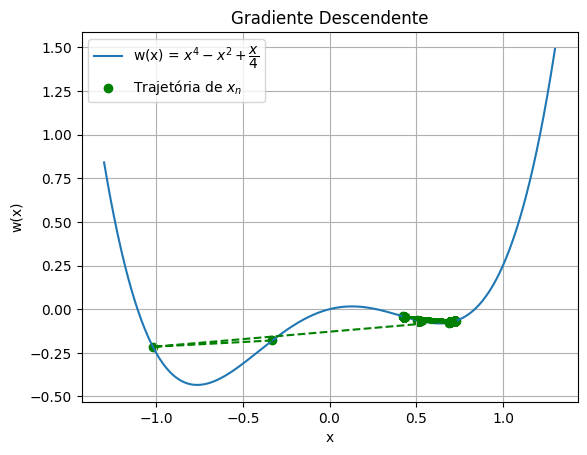

In [7]:
# Função e seu gradiente
def w(x):
    return (x**4 - x**2 + x/4)

def g_w(x):
    return (4*x**3 - 2*x + 1/4)

# Gradiente descendente com visualização
def g_d3(u, g_u, x_0, a, e, n):
    x_vals = np.linspace(-1.3, 1.3, 400)
    plt.plot(x_vals, u(x_vals), label='w(x) = $x^4 - x^2 + \dfrac{x}{4}$')

    z = []
    for i in range(n):
        x = x_0 - a * g_u(x_0)
        r = x - x_0
        z.append(x)
        if abs(r) < e:
            print(f'Convergência em {i} iterações. Mínimo: x = {x:.4f}')
            break
        if abs(x) > 1e5:  # prevenir overflow
            #print(f"Explodiu na iteração {i}.")
            break
        x_0 = x

    z = np.array(z)
    plt.scatter(z, u(z), color='g', label='Trajetória de $x_n$')
    plt.plot(z, u(z), 'g--')
    plt.title("Gradiente Descendente")
    plt.xlabel("x")
    plt.ylabel("w(x)")
    plt.legend()
    plt.grid(True)
    plt.show()
    return z

# Testando a convergência
trajetoria = g_d3(w, g_w, x_0=0.9, a=0.9, e=1e-6, n=1000)

### Exercício 4: nessa atividade a função que desejamos minimizar é uma função de duas variáveis, $U(x,y)=sen(x)\cdot cos(y)+ \dfrac{2(xy)^2}{1000}$. Um gráfico de contorno será feito para estudar os mínimos locais e desenhar a trajetória do ponto (x,y) até o mínimo. Também será feito um gráfico de $U(x_n,y_n) \times n$ ou seja, o valor que U adquirie em cada iteração, para estudarmos ao longo das iterações, a convergência de $U$ para o mínimo.

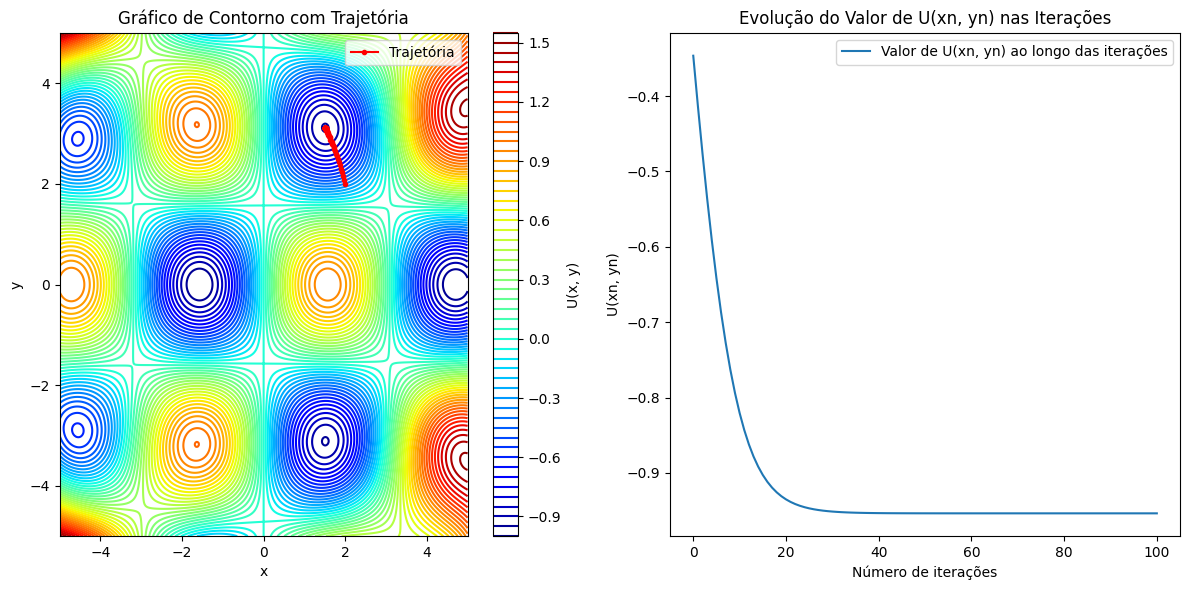

In [18]:
# Função U(x, y)

def U(x, y):
    return np.sin(x)*np.cos(y) + (2*(x*y)**2)/1000

# Gradiente de U(x, y)
def grad_U(x, y):
    # Derivadas parciais de U em relação a x e y
    dU_dx = np.cos(x)*np.cos(y) + (4*x*y**2)/1000
    dU_dy = -np.sin(x)*np.sin(y) + (4*x**2*y)/1000
    return np.array([dU_dx, dU_dy]) #retorna um array com os valores de dudx e dudy.

# Algoritmo de Gradiente Descendente
def gradient_descent(U, grad_U, x0, y0, alpha, n):
    x, y = x0, y0
    trajectory = [(x, y)] # uma lista para adicionar os valores de x e y atualizados
    U_values = [U(x, y)] # uma lista para os valores da função U calculada em cada ponto

    for _ in range(n):
        grad = grad_U(x, y)
        x -= alpha * grad[0] #x atualiza com os valores da primeira coluna (dUdx)
        y -= alpha * grad[1] #y atualiza com os valores da segunda coluna (dUdy)
        trajectory.append((x, y))
        U_values.append(U(x, y))

    return np.array(trajectory), np.array(U_values)

# Parâmetros
x0, y0 = 2, 2  # Posição inicial
alpha = 0.1    # Taxa de aprendizado
n = 100    # Número de iterações

# Gerando os dados de trajetória e valores de U
trajectory, U_values = gradient_descent(U, grad_U, x0, y0, alpha, n)

# Geração do gráfico de contorno com a trajetória
x_vals = np.linspace(-5, 5, 400)
y_vals = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = U(X, Y)

plt.figure(figsize=(12, 6))

# Gráfico de Contorno (1)
plt.subplot(1, 2, 1)
plt.contour(X, Y, Z, 50, cmap='jet')
plt.colorbar(label="U(x, y)")
plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', color='r', markersize=3, label="Trajetória")
plt.title("Gráfico de Contorno com Trajetória")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Gráfico do Valor de U(xn, yn) (2)
plt.subplot(1, 2, 2)
plt.plot(U_values, label="Valor de U(xn, yn) ao longo das iterações")
plt.title("Evolução do Valor de U(xn, yn) nas Iterações")
plt.xlabel("Número de iterações")
plt.ylabel("U(xn, yn)")
plt.legend()

plt.tight_layout()
plt.show()
